<font size = "4.5">**Air and Water Pollution**</font>

1. Which country is the most polluted in terms of each type of pollution: air and water?
2. What about the most clean countries in terms of both air and water qualities?
3. Is there any outlier in both air and water qualities?
4. Is there underlying relationship between air quality and water qualities?

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/User/Documents/Python Scripts/data/pollution.csv")


In [24]:
# remove " " from columns name
rm_quote = lambda x: x.replace('"', '') # replace " by space
df = df.rename(columns = rm_quote)
df = df.rename(columns = lambda x: x.strip())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   City            3963 non-null   object 
 1   Region          3963 non-null   object 
 2   Country         3963 non-null   object 
 3   AirQuality      3963 non-null   float64
 4   WaterPollution  3963 non-null   float64
dtypes: float64(2), object(3)
memory usage: 154.9+ KB


In [25]:
# check NA
print(df.isna().sum())

City              0
Region            0
Country           0
AirQuality        0
WaterPollution    0
dtype: int64


In [27]:
# check duplicate
print(df.duplicated().sum())

0


In [28]:
# Drop Region columns
df = df.drop(columns = ["Region"])

### Top 10 Most Air Pollution

Air Pollution:  
0 = good  
100 = bad  

In [35]:
# Subtract from 100
def sub_100(x):
    return(100-x)

df["AirPollution"] = df['AirQuality'].apply(sub_100)
df['WaterQuality'] = df['WaterPollution'].apply(sub_100)

Text(50, 1.5, 'Overall Average:\n47.33')

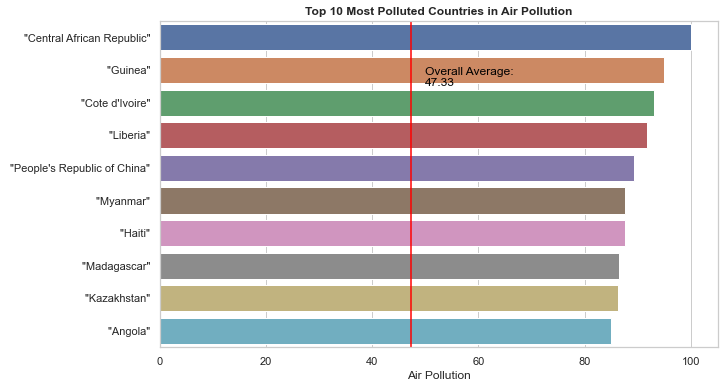

In [38]:
avg_air = df.groupby("Country",as_index=False).agg({"AirPollution":"mean"})
top_10_air = avg_air.sort_values("AirPollution",ascending = False).head(10)
all_air_mean = avg_air["AirPollution"].mean()

# plot graph
plt.figure(figsize = (10,6))
sns.set_theme(style="whitegrid")

y = top_10_air["Country"]
ax1 = sns.barplot(x = "AirPollution", 
                  y= y, 
                  data=top_10_air)

ax1.set_title("Top 10 Most Polluted Countries in Air Pollution", 
              fontweight="bold")
ax1.set_xlabel("Air Pollution")
ax1.set_ylabel("")

# overall mean line
ax1.axvline(x = all_air_mean, 
            ymin = 0, 
            ymax = 100, 
            color = "red")
ax1.text(x = 50, y = 1.5, 
         s = "Overall Average:\n{}".format(round(all_air_mean, 2)), 
         color = "black")


### Top 10 Most Water Pollution
Water pollution:  
0 = none  
100 = extreme 

Text(57, 1.5, 'Overall Average:\n54.74')

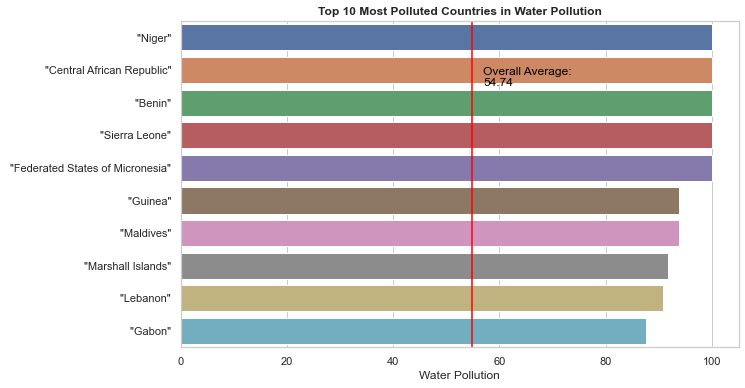

In [48]:
avg_water = df.groupby("Country",as_index=False).agg({"WaterPollution":"mean"})
top10_water = avg_water.sort_values("WaterPollution", ascending = False).head(10)
all_water_mean = avg_water["WaterPollution"].mean()

# gen plot
plt.figure(figsize = (10,6))
sns.set_theme(style="whitegrid")
y = top10_water["Country"]

ax2 = sns.barplot(x = "WaterPollution", 
                  y= y, 
                  data=top10_water)
ax2.set_title("Top 10 Most Polluted Countries in Water Pollution", 
              fontweight="bold")
ax2.set_xlabel("Water Pollution")
ax2.set_ylabel("")

# Overall mean
ax2.axvline(x = all_water_mean, ymin = 0, ymax = 100, color = "red")
ax2.text(x = 57, y = 1.5, 
         s = "Overall Average:\n{}".format(round(all_water_mean, 2)), 
         color = "black")

### Top 10 Least Air Pollution
Air Quality:  
0 = worst  
100 = best

Text(55, 1.5, 'Overall Average:\n52.67')

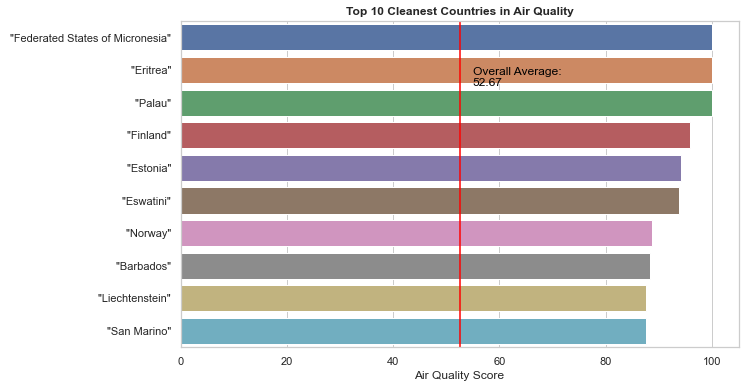

In [55]:
avg_air_q = df.groupby("Country",as_index=False).agg({"AirQuality":"mean"})
best10_air = avg_air_q.sort_values("AirQuality",ascending=False).head(10)
all_airq_mean = avg_air_q["AirQuality"].mean()

# gen plot
plt.figure(figsize=(10,6))
sns.set_theme(style = "whitegrid")

y = best10_air["Country"]

fig = sns.barplot(x = "AirQuality",
                  y = y,
                  data = best10_air)
fig.set_title("Top 10 Cleanest Countries in Air Quality", 
              fontweight="bold")
fig.set_xlabel("Air Quality Score")
fig.set_ylabel("")

# overall mean
fig.axvline(x = all_airq_mean, 
            ymin = 0, ymax = 100, 
            color = "red")
fig.text(x = 55, y = 1.5, 
         s = "Overall Average:\n{}".format(round(all_airq_mean, 2)), color = "black")


### Top 10 Least Water Pollution
Water Quality:  
0 = worst  
100 = best

Text(48, 1.5, 'Overall Average:\n45.26')

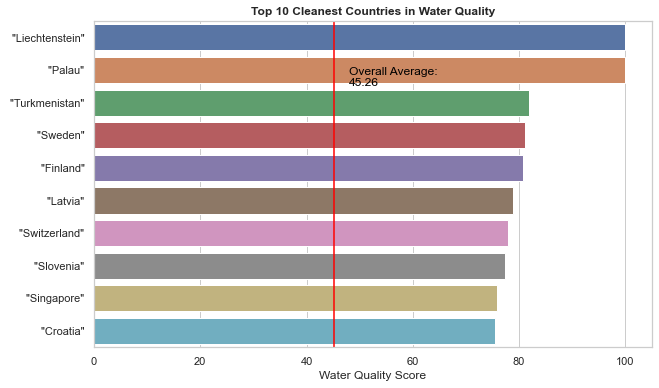

In [64]:
avg_water_q = df.groupby("Country",as_index=False).agg({"WaterQuality":"mean"})
best10_water = avg_water_q.sort_values("WaterQuality",ascending = False).head(10)
all_waterq_mean = avg_water_q["WaterQuality"].mean()

# gen plot
plt.figure(figsize = (10,6))
sns.set_theme(style = "whitegrid")

y = best10_water["Country"]
fig = sns.barplot(x = "WaterQuality",
                  y = y,
                  data = best10_water)
fig.set_title("Top 10 Cleanest Countries in Water Quality", 
              fontweight = "bold")
fig.set_xlabel("Water Quality Score")
fig.set_ylabel("")

# overall mean
fig.axvline(x = all_waterq_mean, 
             ymin = 0, ymax = 100, color = "red")
fig.text(x = 48, y = 1.5, 
         s = "Overall Average:\n{}".format(round(all_waterq_mean, 2)), 
         color = "black")